<a href="https://colab.research.google.com/github/2kunal6/UniBonn/blob/master/cuda_lab/2/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files already downloaded and verified
Files already downloaded and verified
datasets loaded
Label: tensor(7)


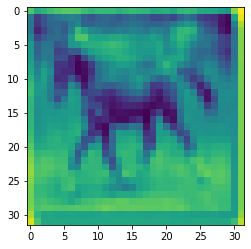

Running on the GPU
epoch: 0, loss: 2.5020666122436523
epoch: 1, loss: 2.1341543197631836
[[130  88 298   7 222   8   5   7 215  20]
 [ 18 498 103  16  95   9   6  16 165  74]
 [ 23  74 436  19 298  16  14  14  94  12]
 [ 18 129 251  65 326  57  15  14 104  21]
 [ 24  86 289  20 465   5  13  14  74  10]
 [ 34  75 241  34 321 136   9  13 122  15]
 [ 11 216 260  36 288  30  30   5 115   9]
 [ 31  68 263  23 301  12  12 109 136  45]
 [ 76 153 128  14  84  30   3  23 458  31]
 [ 28 324 111  11  85   4   3  15 195 224]]
Accuracy of the network on the 10000 test images: 25 %


In [23]:
import torch
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

np.random.seed(1)

transform_list = transforms.Compose([
            transforms.Grayscale(num_output_channels=1),
            transforms.ToTensor()
            #transforms.Normalize([0.5,],[0.5,])
        ])
train = torch.utils.data.DataLoader(
    datasets.CIFAR10("./", train=True, transform=transform_list, download=True), batch_size = 32, shuffle = True
)

test = torch.utils.data.DataLoader(
    datasets.CIFAR10("./", train=False, transform=transform_list, download=True), batch_size = 32, shuffle = True
)

print("datasets loaded")

IMG_SIZE = 32*32

for data in train:
  X, y = data[0][0], data[1][0]
  plt.imshow(X.view(32, 32))
  print("Label: " + str(y))
  plt.show()
  break

class LogisticRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LogisticRegression, self).__init__()
    self.linear = torch.nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.linear(x)

if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

model = LogisticRegression(IMG_SIZE, 10).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(2):
  for data in train:
    X, y = data[0].to(device), data[1].to(device)
    optimizer.zero_grad()
    output = model(X.view(-1, IMG_SIZE))
    loss = F.cross_entropy(output, y)
    loss.backward()
    optimizer.step()
  print(f'epoch: {epoch}, loss: {loss}')

total = 0
correct = 0

y_true = []
y_pred = []
with torch.no_grad():
  for data in test:
    X, y = data[0].to(device), data[1].to(device)
    output = model(X.view(-1, IMG_SIZE))
    _, predicted = torch.max(output, 1)
    total += y.size(0)
    correct += (predicted == y).sum().item()
    y_pred.extend(predicted.tolist())
    y_true.extend(y.tolist())

print(confusion_matrix(y_true, y_pred))
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))